In [1]:
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn 
import pandas
import geopandas 
import numpy
import matplotlib.pyplot as plt

In [2]:
# Read file
db = geopandas.read_file('sanDiego/sandiego_tracts.gpkg')

In [3]:
cluster_variables =  [
    'median_house_value', # Median house value
    'pct_white',          # % tract population that is white
    'pct_rented',         # % households that are rented
    'pct_hh_female',      # % female-led households 
    'pct_bachelor',       # % tract population with a Bachelors degree
    'median_no_rooms',    # Median n. of rooms in the tract's households
    'income_gini',        # Gini index measuring tract wealth inequality
    'median_age',         # Median age of tract population
    'tt_work'             # Travel time to work 
]

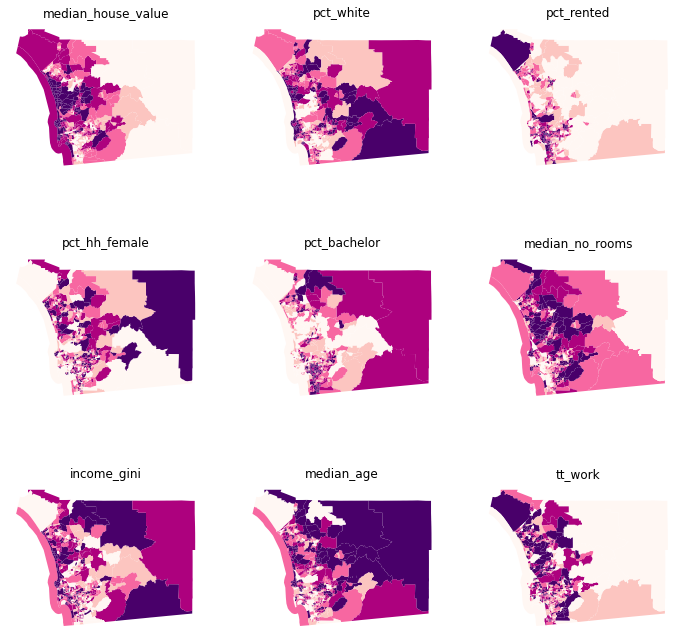

In [4]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    db.plot(
        column=col, 
        ax=ax,
        scheme='Quantiles', 
        linewidth=0,
        cmap='RdPu'
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

In [5]:
w = Queen.from_dataframe(db)

In [6]:
# Set seed for reproducibility
numpy.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [Moran(db[variable], w) for variable in cluster_variables]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim) for variable,res in zip(cluster_variables, mi_results)
]
# Display on table
table = pandas.DataFrame(
    mi_results,
    columns=['Variable', "Moran's I", 'P-value']
).set_index('Variable')
table

,Moran's I,P-value
Variable,,
median_house_value,0.646618,0.001
pct_white,0.602079,0.001
pct_rented,0.451372,0.001
pct_hh_female,0.282239,0.001
pct_bachelor,0.433082,0.001
median_no_rooms,0.538996,0.001
income_gini,0.295064,0.001
median_age,0.381440,0.001
tt_work,0.102748,0.001


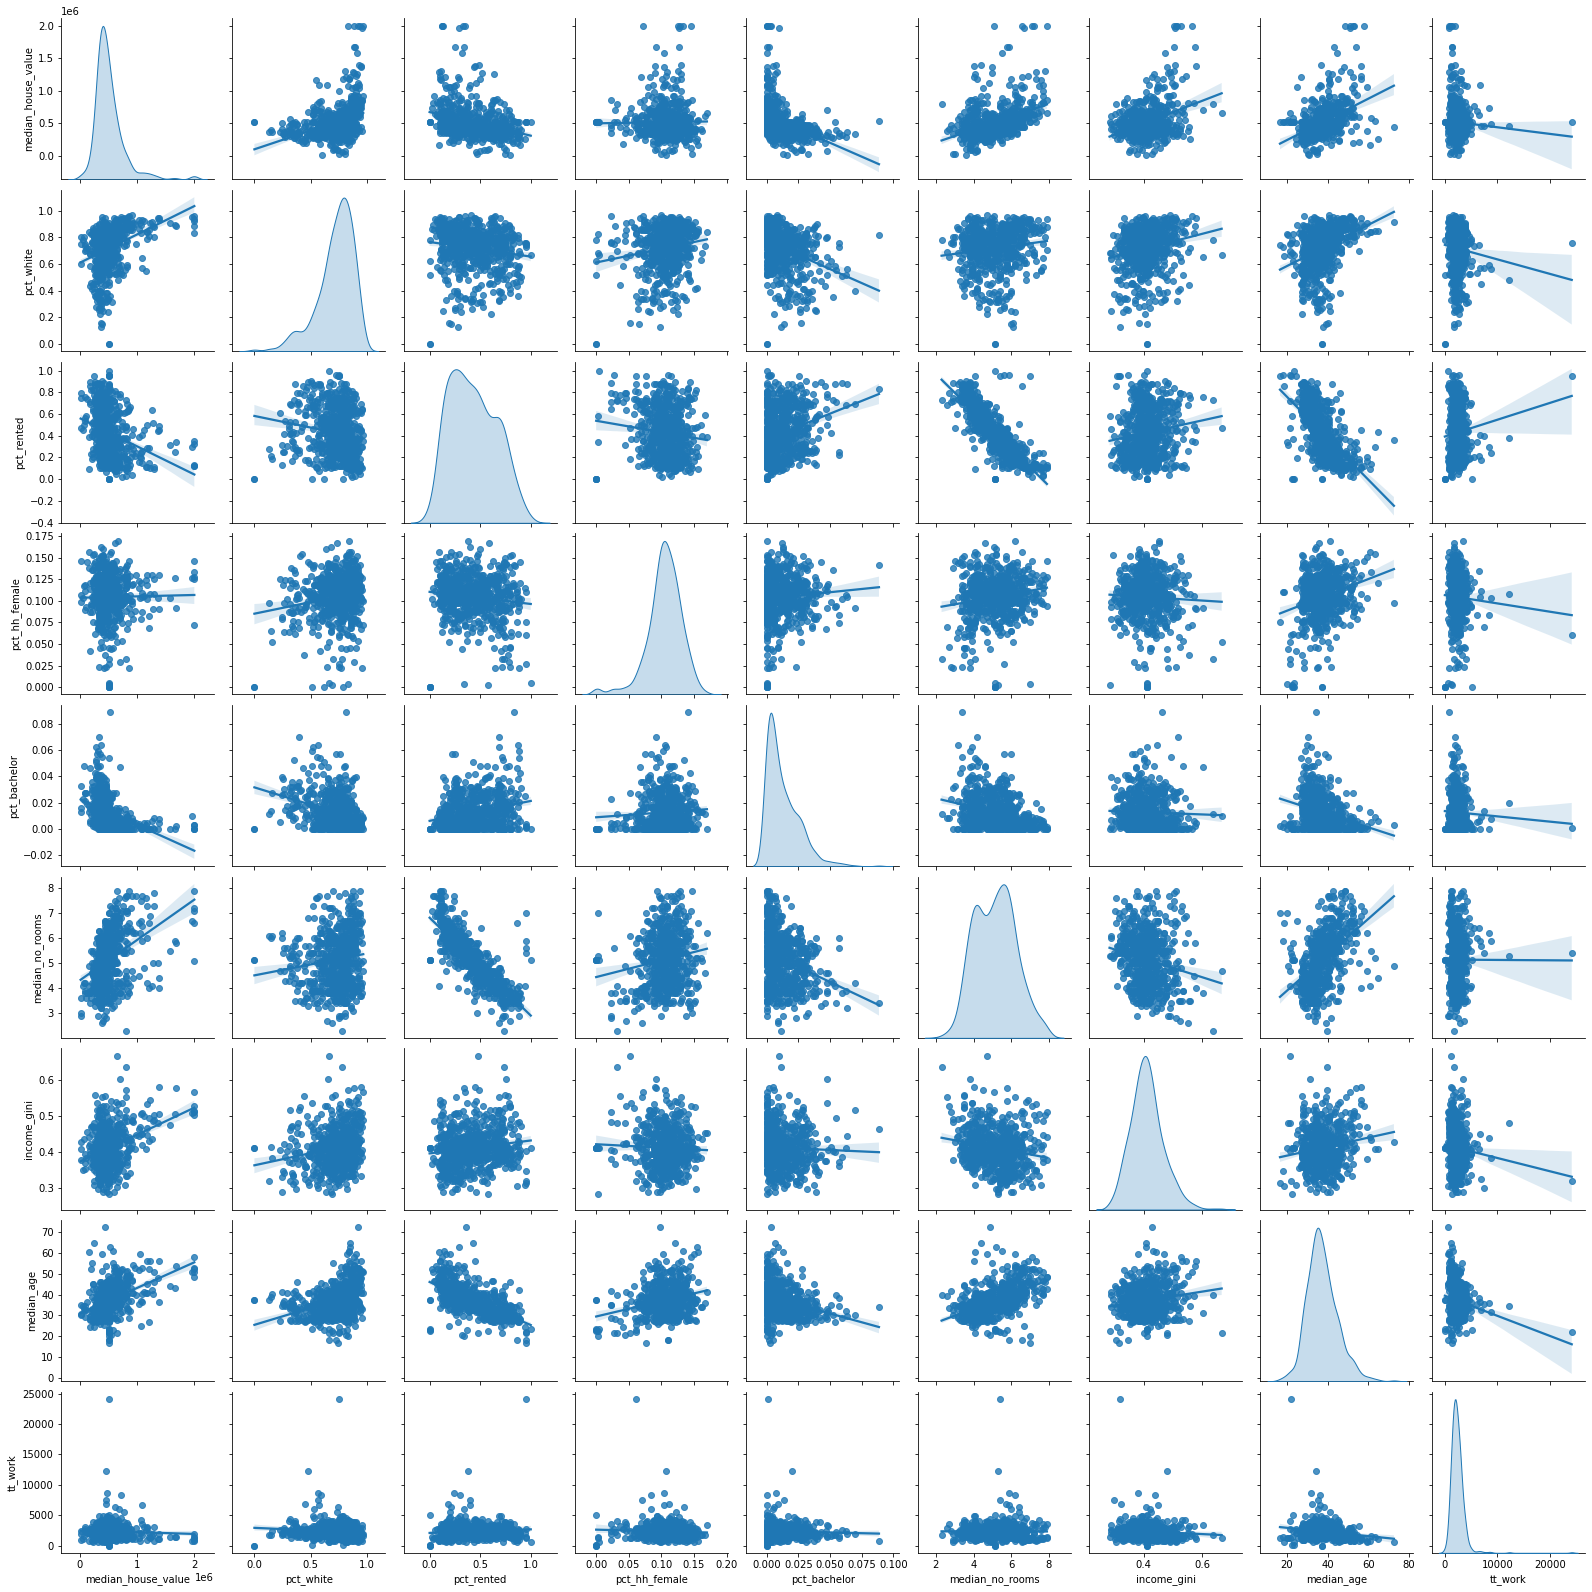

In [7]:
_ = seaborn.pairplot(db[cluster_variables], kind='reg', diag_kind='kde')

In [8]:
db[['income_gini', 'median_house_value']].head()

,income_gini,median_house_value
0,0.5355,732900.000000
1,0.4265,473800.000000
2,0.4985,930600.000000
3,0.4003,478500.000000
4,0.3196,515570.896382


In [9]:
from sklearn import metrics

In [10]:
metrics.pairwise_distances(
    db[['income_gini', 'median_house_value']].head()
).round(4)

array([[     0.    , 259100.    , 197700.    , 254400.    , 217329.1036],
       [259100.    ,      0.    , 456800.    ,   4700.    ,  41770.8964],
       [197700.    , 456800.    ,      0.    , 452100.    , 415029.1036],
       [254400.    ,   4700.    , 452100.    ,      0.    ,  37070.8964],
       [217329.1036,  41770.8964, 415029.1036,  37070.8964,      0.    ]])

In [11]:
from sklearn.preprocessing import robust_scale

In [12]:
db_scaled = robust_scale(db[cluster_variables])

In [14]:
db_scaled

array([[ 1.16897565,  0.88747229, -0.07925532, ...,  1.93719258,
         0.1011236 , -0.6982584 ],
       [ 0.08123426,  0.20084202, -0.54215204, ...,  0.28755202,
         0.56179775, -0.15471851],
       [ 1.99895046,  0.68795166, -0.33950017, ...,  1.37722285,
         2.04494382, -0.37181045],
       ...,
       [-0.02581864,  1.04512769, -0.79870967, ..., -1.11842603,
         0.93258427, -0.04860267],
       [ 0.20969773,  0.56397715, -0.83360459, ..., -0.03783579,
         1.1011236 , -0.63831511],
       [-1.24118388,  0.4812156 , -0.84270269, ...,  0.51608021,
         2.74157303, -1.1891454 ]])

In [17]:
pandas.DataFrame(db_scaled, columns=cluster_variables)

,median_house_value,pct_white,pct_rented,pct_hh_female,pct_bachelor,median_no_rooms,income_gini,median_age,tt_work
0,1.168976,0.887472,-0.079255,-1.850252,-0.508385,-0.731038,1.937193,0.101124,-0.698258
1,0.081234,0.200842,-0.542152,0.124959,-0.230627,0.798373,0.287552,0.561798,-0.154719
2,1.998950,0.687952,-0.339500,-0.934354,-0.146402,0.621903,1.377223,2.044944,-0.371810
3,0.100966,0.255369,-0.565827,-0.520096,-0.118390,0.857197,-0.108967,0.685393,0.995545
4,0.256595,0.001212,1.500515,-1.573297,-0.474475,0.151315,-1.330306,-1.617978,17.806399
...,...,...,...,...,...,...,...,...,...
623,0.220613,-0.194499,-0.754675,-0.093764,0.159548,0.563079,-0.676504,0.606742,1.094370
624,-0.113980,0.042021,-0.167527,0.089098,-0.508385,0.033667,-0.873250,0.000000,-0.388821
625,-0.025819,1.045128,-0.798710,0.408755,-0.214001,0.857197,-1.118426,0.932584,-0.048603
626,0.209698,0.563977,-0.833605,-0.237555,-0.216864,0.445432,-0.037836,1.101124,-0.638315


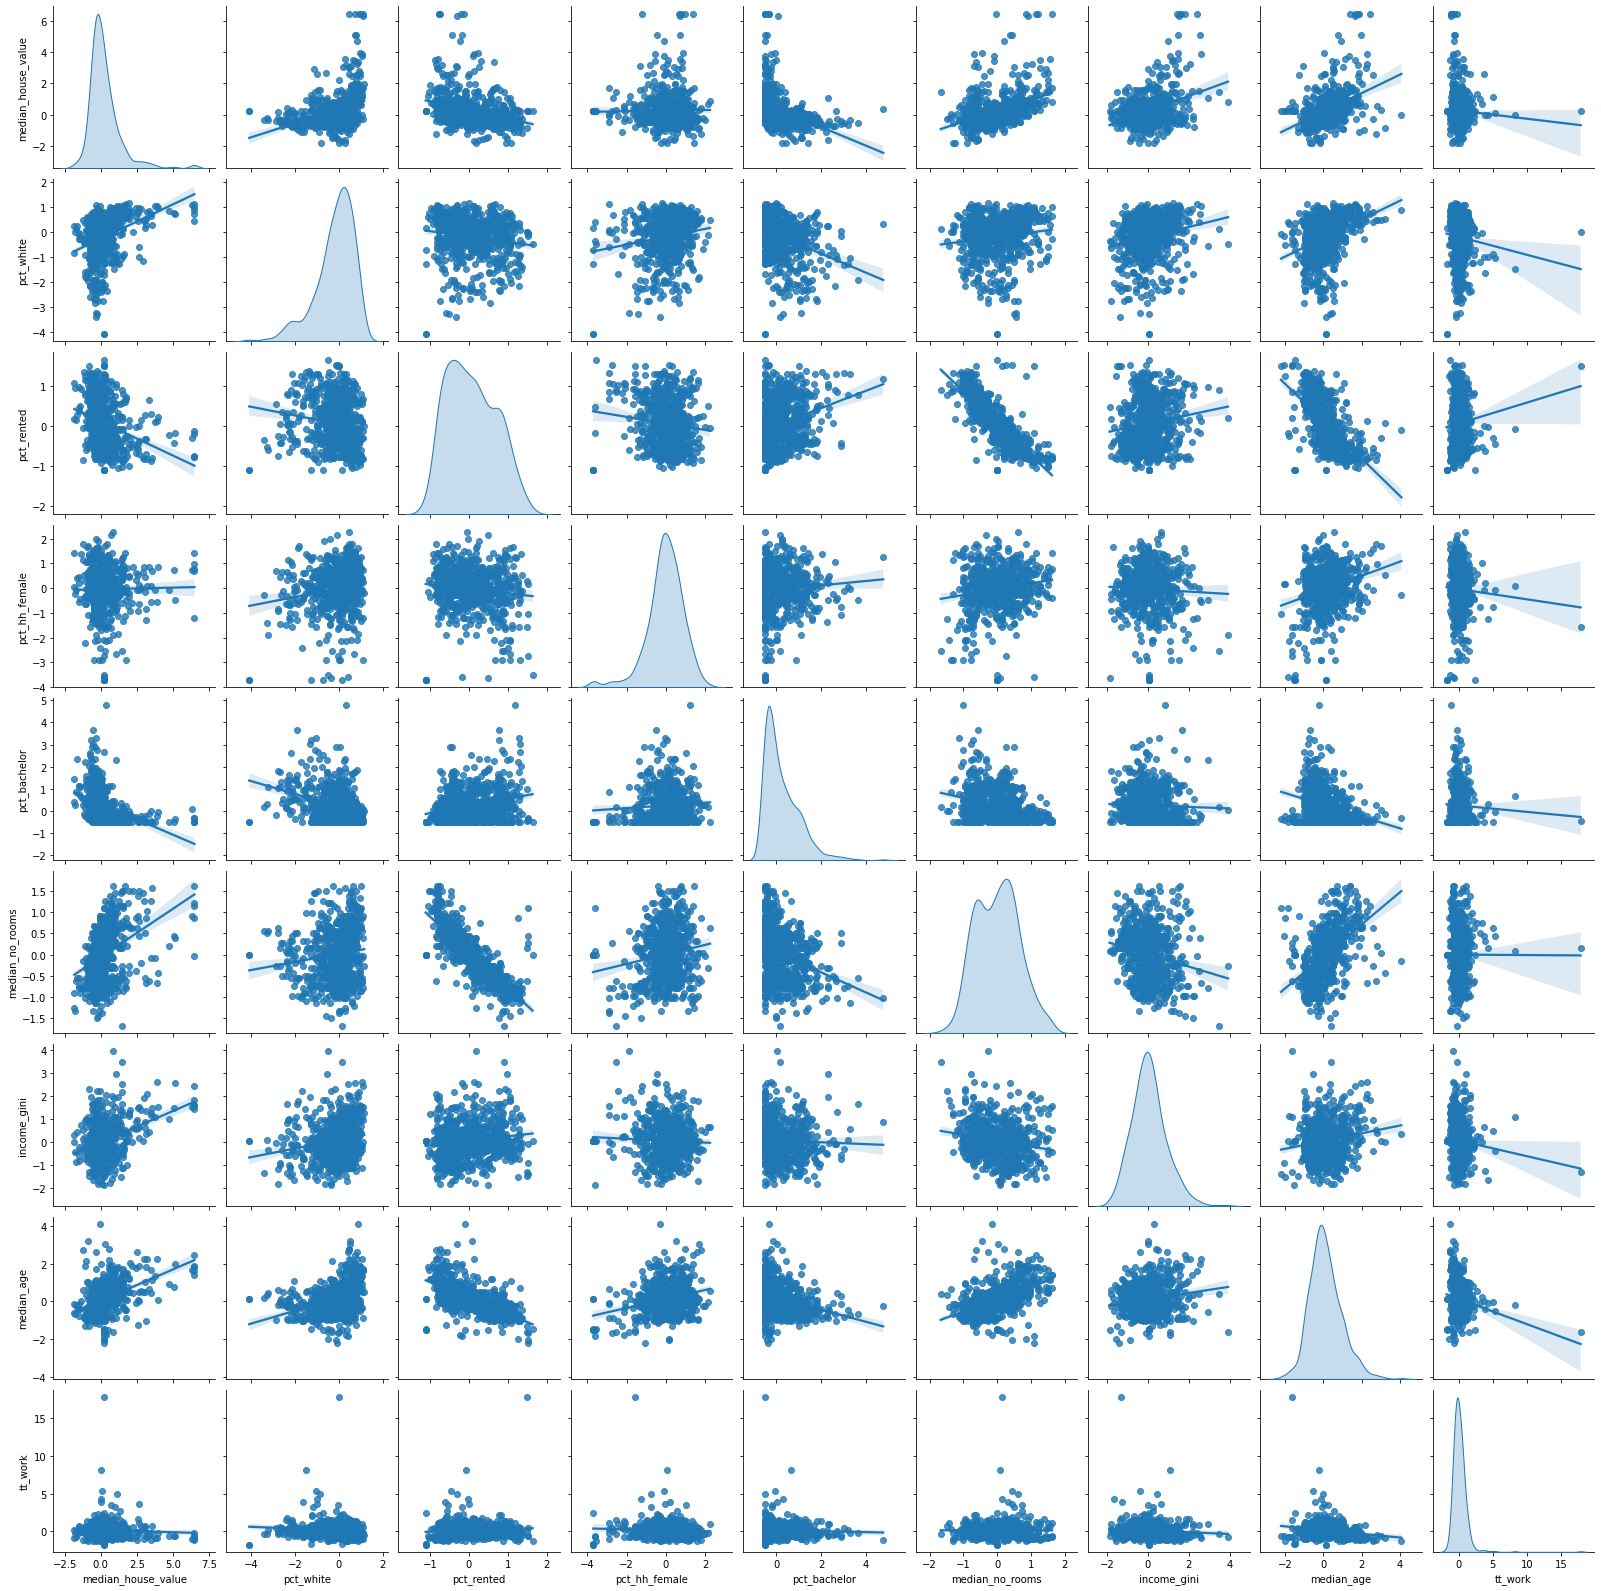

In [18]:
_ = seaborn.pairplot(pandas.DataFrame(db_scaled, columns=cluster_variables)[cluster_variables], kind='reg', diag_kind='kde')